# Importing Required Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as mpl
from keras import regularizers

In [ ]:
from zipfile import ZipFile # for openup zip file

In [ ]:
zipext = ZipFile("/content/Cotton img.zip")
zipext.extractall("/content")
zipext.close()

In [ ]:
from keras.utils import image_dataset_from_directory # For import image datasets

# Importing image data from directory

In [ ]:
train_df=image_dataset_from_directory (
  directory='/content/Cotton img/train',
  labels= 'inferred',                  # Assign Labels as order of the folder
  label_mode='int',
  batch_size=32,                       # How much images passes in one epoch
  color_mode='rgb'
)

test_df=image_dataset_from_directory(
  directory='/content/Cotton img/val',
  labels= 'inferred',
  label_mode='int',
  batch_size=32,
  color_mode='rgb'
)




Found 1951 files belonging to 4 classes.
Found 324 files belonging to 4 classes.


In [ ]:
def convert (image,label):          # To scale data in range of 0 to 1 , Each pixel is divided by 255
  image=tf.cast(image/255,tf.float32)
  return image,label

In [ ]:
train_df=train_df.map(convert)      # To apply above function to entire dataset
test_df=test_df.map(convert)

# Building CNN Architecture

In [ ]:
first_model = Sequential()

first_model.add(Conv2D(128,kernel_size = (3,3),padding = "valid",activation = "relu",input_shape = (256,256,3)))
first_model.add(Conv2D(128,kernel_size = (3,3),padding = "same",activation = "relu"))
first_model.add(BatchNormalization())
first_model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))

first_model.add(Conv2D(256,kernel_size = (3,3),padding = "valid",activation = "relu"))
first_model.add(Conv2D(256,kernel_size = (3,3),padding = "same",activation = "relu"))
first_model.add(BatchNormalization())
first_model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))

first_model.add(Conv2D(512,kernel_size = (3,3),padding = "valid",activation = "relu"))
first_model.add(Conv2D(512,kernel_size = (3,3),padding = "same",activation = "relu"))
first_model.add(Conv2D(512,kernel_size = (3,3),padding = "same",activation = "relu"))
first_model.add(BatchNormalization())
first_model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))

first_model.add(Flatten())

first_model.add(Dense(128,activation = "relu",kernel_initializer = "he_uniform",kernel_regularizer=regularizers.L1(0.01)))
first_model.add(Dense(128,activation = "relu",kernel_initializer = "he_uniform",kernel_regularizer=regularizers.L1(0.01)))
first_model.add(Dropout(0.4))
first_model.add(Dense(4,activation = "softmax"))

In [ ]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 128)     147584    
                                                                 
 batch_normalization (Batch  (None, 254, 254, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 256)     295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 256)     5

In [ ]:
first_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
callback=EarlyStopping(
monitor='val_loss',
patience=5,
mode='auto'
)

In [ ]:
history=first_model.fit(train_df,epochs=1000,validation_data=test_df,callbacks=callback)

Epoch 1/1000
61/61 [==============================] - 165s 2s/step - loss: 406.9655 - accuracy: 0.4326 - val_loss: 120.3646 - val_accuracy: 0.3333
Epoch 2/1000
61/61 [==============================] - 78s 1s/step - loss: 90.5817 - accuracy: 0.3998 - val_loss: 87.4399 - val_accuracy: 0.1975
Epoch 3/1000
61/61 [==============================] - 76s 1s/step - loss: 94.8733 - accuracy: 0.4511 - val_loss: 103.0255 - val_accuracy: 0.3858
Epoch 4/1000
61/61 [==============================] - 77s 1s/step - loss: 91.5372 - accuracy: 0.4915 - val_loss: 86.1439 - val_accuracy: 0.5093
Epoch 5/1000
61/61 [==============================] - 77s 1s/step - loss: 84.4601 - accuracy: 0.4967 - val_loss: 83.1980 - val_accuracy: 0.4815
Epoch 6/1000
61/61 [==============================] - 77s 1s/step - loss: 84.6492 - accuracy: 0.5105 - val_loss: 85.0147 - val_accuracy: 0.4321
Epoch 7/1000
61/61 [==============================] - 76s 1s/step - loss: 83.5390 - accuracy: 0.5413 - val_loss: 83.3491 - val_accur

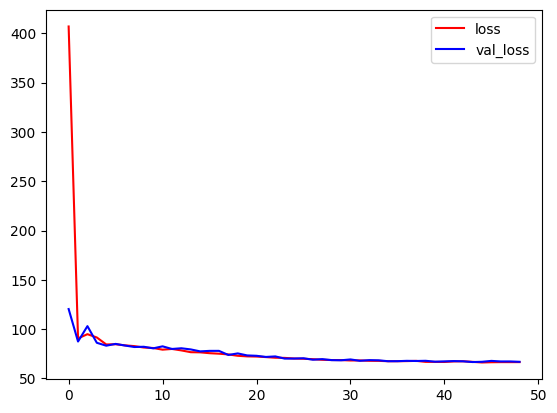

In [ ]:
mpl.plot(history.history["loss"],color = "red",label = "loss")
mpl.plot(history.history["val_loss"],color = "blue",label = "val_loss")
mpl.legend()
mpl.show()

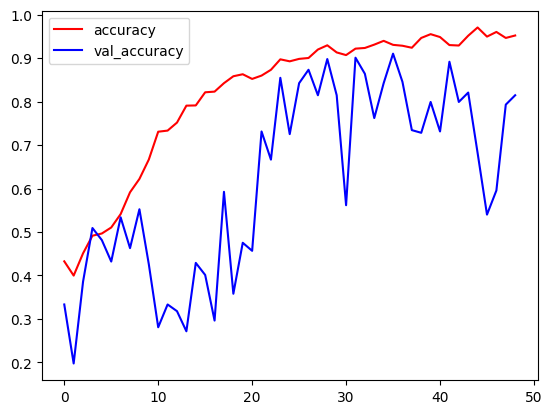

In [ ]:
mpl.plot(history.history["accuracy"],color = "red",label = "accuracy")
mpl.plot(history.history["val_accuracy"],color = "blue",label = "val_accuracy")
mpl.legend()
mpl.show()

# Transfer Learning

In [ ]:
from keras.applications import vgg16

In [ ]:
vgg_model = Sequential()

In [ ]:
conv_layers = vgg16.VGG16(
    include_top = False,
    weights = "imagenet",
    input_shape = (256,256,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_layers.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
conv_layers.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [ ]:
vgg_model.add(conv_layers)

vgg_model.add(Flatten())

vgg_model.add(Dense(64,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.01)))
vgg_model.add(Dense(128,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.01)))

vgg_model.add(Dense(4,activation = "softmax"))

In [ ]:
conv_layers.trainable = False

In [ ]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                2097216   
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 16820740 (64.17 MB)
Trainable params: 2106052 (8.03 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
vgg_model.compile(optimizer = "Adam",loss = "sparse_categorical_crossentropy",metrics = "accuracy")

In [ ]:
history = vgg_model.fit(train_df,epochs = 1000,validation_data = test_df,callbacks = callback)

Epoch 1/1000
61/61 [==============================] - 27s 324ms/step - loss: 35.5741 - accuracy: 0.6012 - val_loss: 13.4535 - val_accuracy: 0.6512
Epoch 2/1000
61/61 [==============================] - 14s 221ms/step - loss: 11.4408 - accuracy: 0.7207 - val_loss: 10.1033 - val_accuracy: 0.6358
Epoch 3/1000
61/61 [==============================] - 14s 215ms/step - loss: 8.8505 - accuracy: 0.7504 - val_loss: 8.0201 - val_accuracy: 0.7438
Epoch 4/1000
61/61 [==============================] - 13s 211ms/step - loss: 7.2015 - accuracy: 0.7904 - val_loss: 6.4795 - val_accuracy: 0.8549
Epoch 5/1000
61/61 [==============================] - 13s 212ms/step - loss: 6.0455 - accuracy: 0.8180 - val_loss: 5.6032 - val_accuracy: 0.8148
Epoch 6/1000
61/61 [==============================] - 13s 210ms/step - loss: 5.3169 - accuracy: 0.8283 - val_loss: 5.0309 - val_accuracy: 0.8302
Epoch 7/1000
61/61 [==============================] - 13s 213ms/step - loss: 4.8847 - accuracy: 0.8344 - val_loss: 4.6779 - va

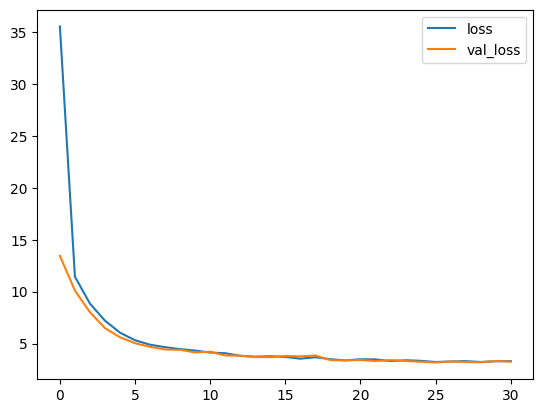

In [ ]:
mpl.plot(history.history["loss"],label = "loss")
mpl.plot(history.history["val_loss"],label = "val_loss")
mpl.legend()
mpl.show()

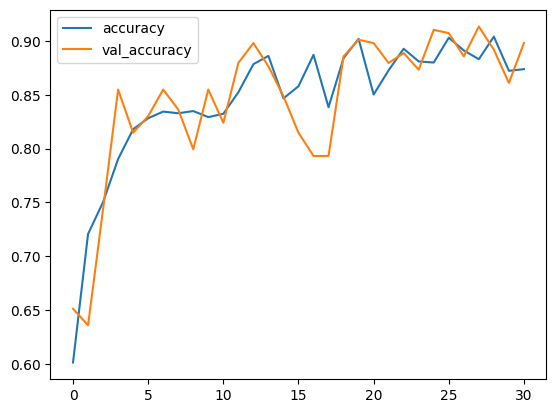

In [ ]:
mpl.plot(history.history["accuracy"],label = "accuracy")
mpl.plot(history.history["val_accuracy"],label = "val_accuracy")
mpl.legend()
mpl.show()